Лабораторная №3

Подгружаем библиотеки

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math

Загружаем картинку

In [3]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

Для начала бинаризируем изображение, чтобы было проще работать с границами

In [4]:
bin_img = copy.deepcopy(image_gray)
border  = 80 
bin_img[image_gray < border] = 0
bin_img[image_gray >= border] = 255

Затем ищем линии с помощью детектора границ Canny.

In [5]:
canny = cv2.Canny(bin_img,0,250,apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)

Чтобы не портить исходник, создадим копию изображения.

In [6]:
line_image=image.copy()

Рисуем на изображении самую длинную найденную линию

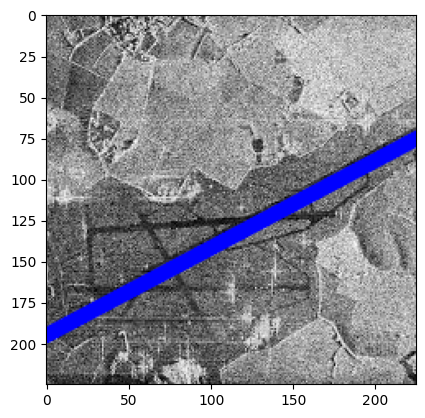

In [7]:
if lines is not None:
    for i in range(0, len(lines)):
        longest = None
        max = 0
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        if length > max:
            max = length
            longest = (pt1, pt2)
    if longest:
        cv2.line(line_image, longest[0], longest[1], (0, 0, 255), 7, cv2.LINE_AA)

plt.imshow(line_image)
plt.show()

Не стал тянуть за собой ошибку предыдущей лабы и сделал нормальную функцию сравнения двух изображений.

In [8]:
def image_diff(image1, title1, image2, title2):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.imshow(image1, cmap='gray')
    plt.title(title1)

    plt.subplot(1,2,2)
    plt.imshow(image2, cmap='gray')
    plt.title(title2)

    plt.show()

Уже знаем как бинаризировать изображение точечно, но теперь можно посмотреть как это выглядит.

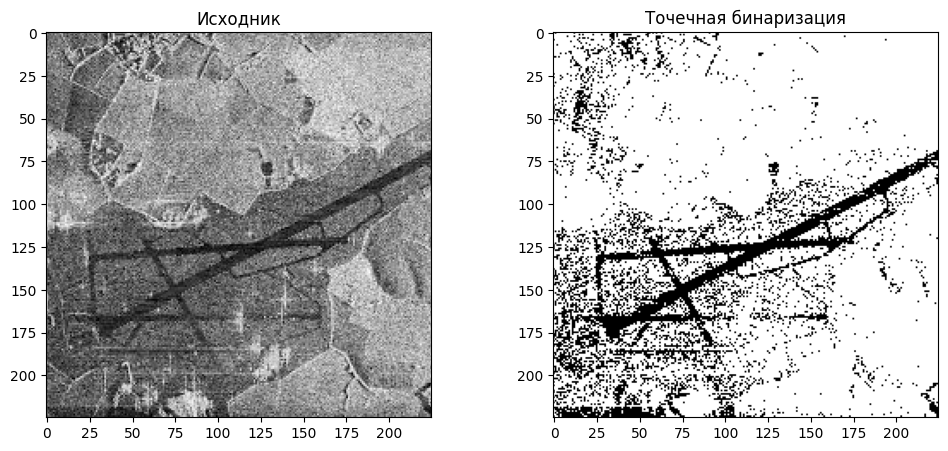

In [9]:
bin_img = copy.deepcopy(image_gray)
T  = 80
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255
image_diff(image, 'Исходник', bin_img, 'Точечная бинаризация')

Реализация бинаризации Отсу

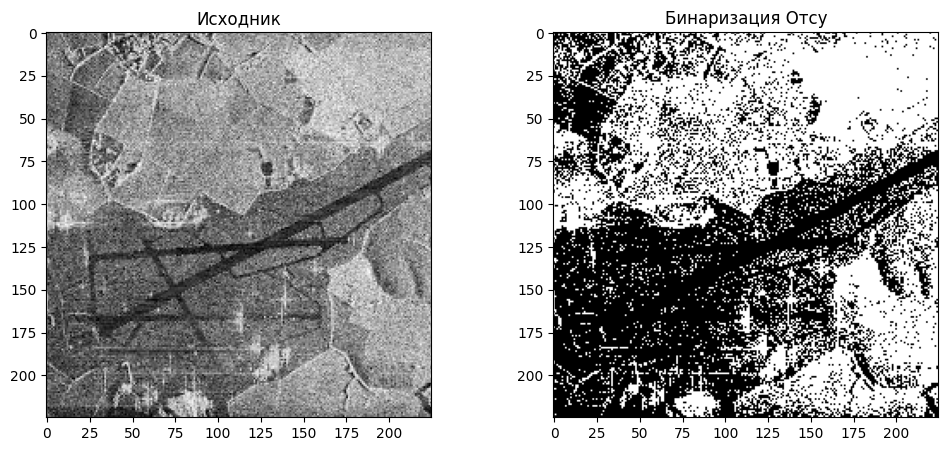

In [10]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

image_diff(image, 'Исходник', th2, 'Бинаризация Отсу')

Реализация адаптивной бинаризации

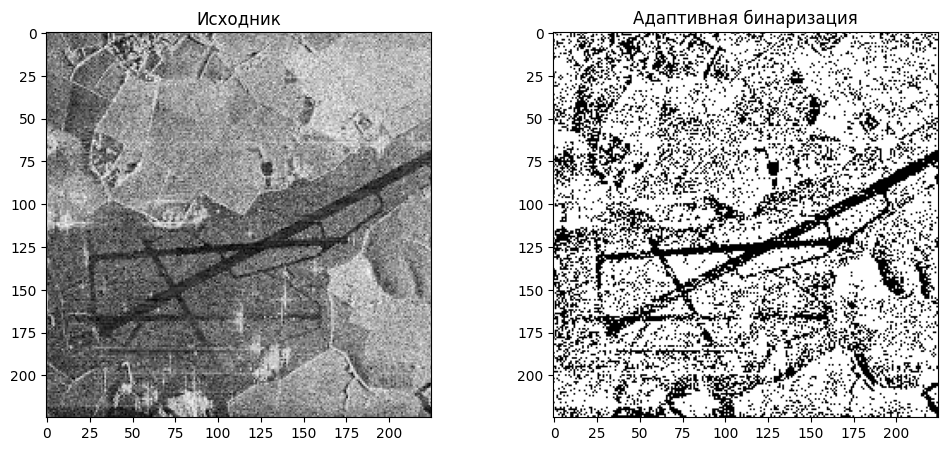

In [11]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)

image_diff(image, 'Исходник', th3, 'Адаптивная бинаризация')

Реализация оператора Собеля

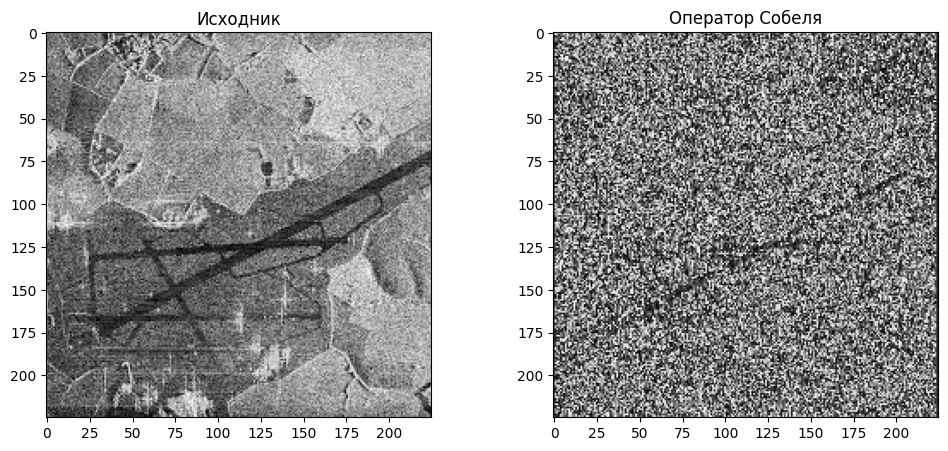

In [12]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
th3=(grad_x - grad_x.min())*255
image_diff(image, 'Исходник', th3, 'Оператор Собеля')

То, как работает детектор границ Canny

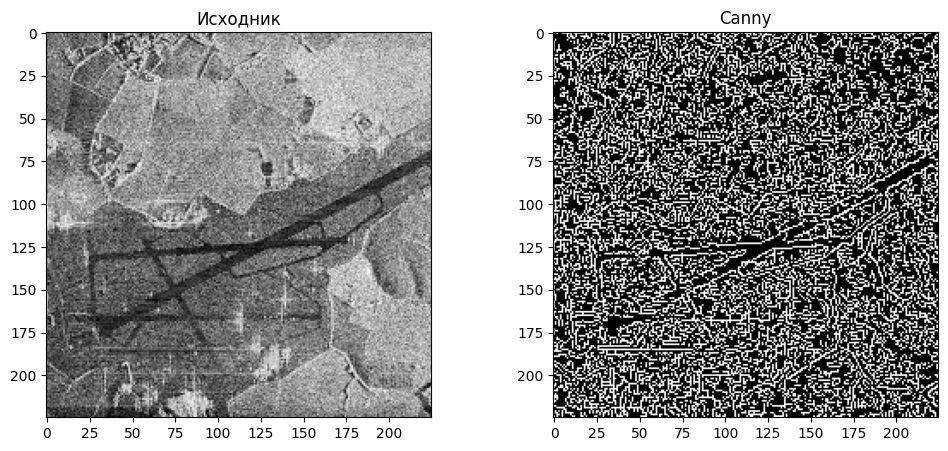

In [13]:
edges = cv2.Canny(image_gray,100,200)
image_diff(image, 'Исходник', edges, 'Canny')

Для наглядности, так работает Canny с бинаризированным изображением. Всё становится проще без лишней детализации и текстур.

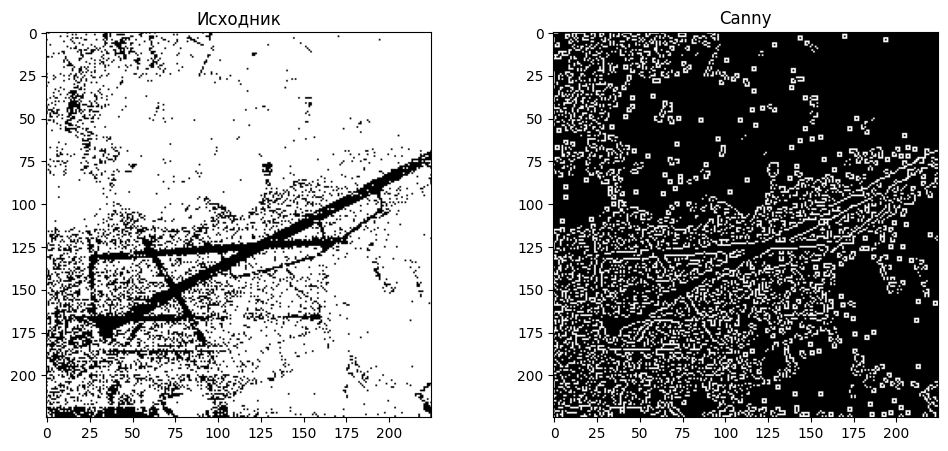

In [14]:
edges = cv2.Canny(bin_img,0,250)
image_diff(bin_img, 'Исходник', edges, 'Canny')